# standard plot

C:\Users\fengxiang.mao\AppData\Local\Temp\ipykernel_7980\748922594.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


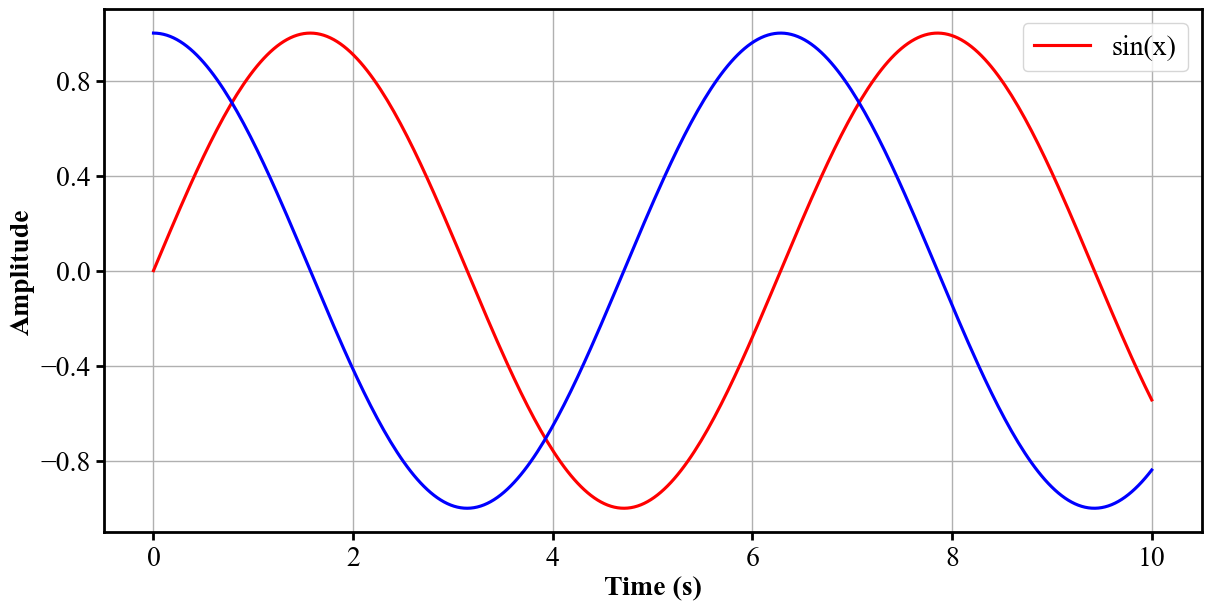

In [3]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from plot_style import *

x = np.linspace(0, 10, 300)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = make_standard_figure(figsize=( 12,6),grid=True, legend='auto')  # legend='auto'表示自动放置图例
ax.plot(x, y1, label='sin(x)')  # 线宽/颜色顺序已按规范
ax.plot(x, y2, label='cos(x)')

ax.set_xlabel('Time (s)')       # 标题已自动加粗、字号=20、Times New Roman
ax.set_ylabel('Amplitude')

# 已自动放右上角；若需要微调边框或透明度，可这样：
# fig, ax, place_legend = make_standard_figure(return_legend_placer=True)
# ...绘图后...
#place_legend(frameon=True)  # 例如需要图例带边框

fig.show()
# save_figure(fig, 'my_plot.png', dpi=400, transparent=False)

In [4]:
from matplotlib import font_manager as fm

# 方式 A：名字是否可见
has_tnr = 'Times New Roman' in [f.name for f in fm.fontManager.ttflist]
print('Has Times New Roman?', has_tnr)

# 方式 B：拿到字体文件路径（若找不到会回退到其他字体）
path = fm.findfont('Times New Roman', fallback_to_default=False)
print('Path:', path)  # 如果抛错 / 找不到，就表示系统没有该字体


Has Times New Roman? True
Path: C:\Windows\Fonts\times.ttf


# plot strain v.s. depth in some certain time point

In [2]:
%reload_ext autoreload
%autoreload 2


import h5py
import pandas as pd
from plot_style import make_standard_figure, plot_depth_profiles_in_window, decode_stamps_to_datetimeindex

f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/Evo_5_6_7_Sep_2025/Evo 7 (flowback)/Zgabay A14H - flowback - strain change.h5','r')
# f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 5 (POP)/Zgabay A14H - pop - strain change.h5','r')



dstrain = (f1['data'])
depth = (f1['depth'])
date_plot = (f1['stamps'])

print(dstrain.shape)  # (时间点数, 深度点数)


(3415, 57204)


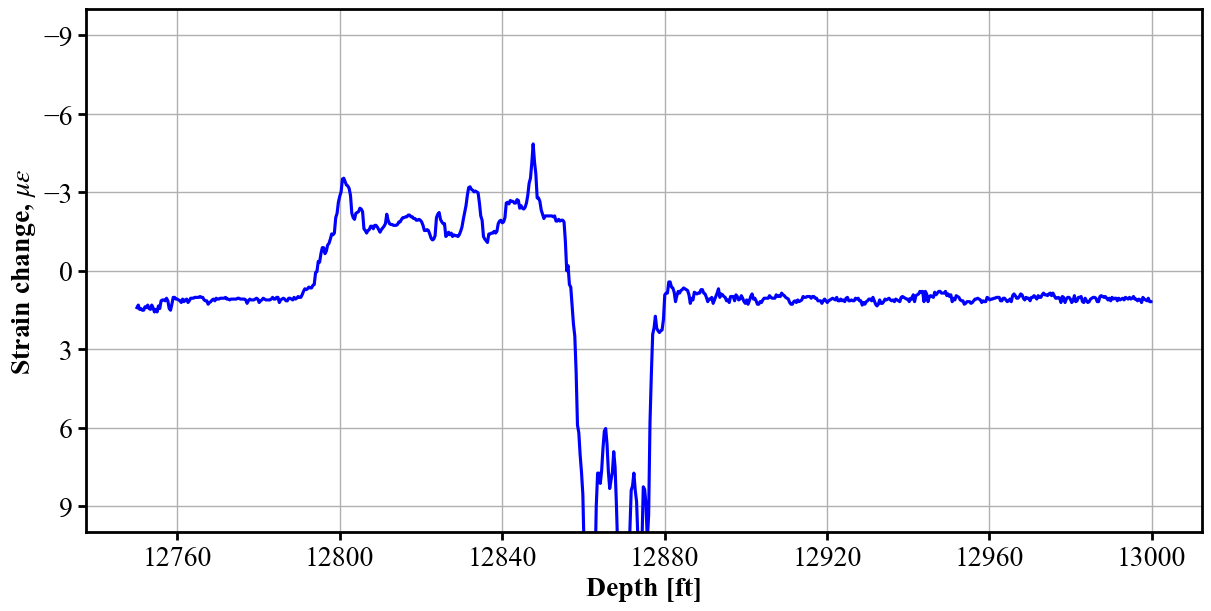

In [100]:

# （可选）把 stamps 转为 DatetimeIndex，便于时间戳就近匹配
stamps_idx = decode_stamps_to_datetimeindex(date_plot, fmt='%m/%d/%Y %H:%M:%S.%f') if date_plot is not None else None

# 1) 用“行号”选多个时刻
# fig, ax = plot_depth_profiles_in_window(
#     dstrain, depth,
#     depth_min=12000, depth_max=16000,
#     times=[5000, 5500],                # 多个时刻（行号）
#     stamps_index=None,                      # 行号选时刻时不用传
#     depth_unit="ft", strain_unit="(microstrain)",
#     grid=True, legend='auto',                # 继承了 make_standard_figure 的风格与图例逻辑
#     figsize = (12, 6)
# )
# # 用你自定义的文本覆盖
# lines = [ln for ln in ax.get_lines() if ln.get_label() != '_nolegend_']
# ax.legend(lines, ["line_5000", "line_5500"])   # 覆盖成你的自定义文本


# 2) 用“时间戳”选多个时刻（需要 stamps_index）
fig, ax = plot_depth_profiles_in_window(
    dstrain, depth, 
    depth_min=12800-50, depth_max=13000,#
    # times=["2022-06-01 07:51:07"],
    times=[#"2022-06-01 08:00:00",
        #    "2022-06-01 08:09:03",
        #    "2022-06-02 08:00:00",
        #    "2022-06-03 08:00:00",
           "2022-06-03 11:00:00",],
        #    "2022-06-04 08:00:00",
        #    "2022-06-05 07:30:00",
        #    "2022-06-06 09:45:00",],   # 多个时刻（时间字符串） #["2022-03-19 18:51:16", "2022-03-14 21:10:00"]

    stamps_index=stamps_idx,                                 # 传入时间索引以最近匹配
    depth_unit="ft", strain_unit=r'$\mu\varepsilon$',
    grid=True, legend='auto',
    figsize = (12, 6)
)

ax.set_ylim(-10,10)
ax.legend(loc='lower left', ncol=2) #'upper left'
leg = ax.get_legend()
if leg is not None:
    leg.remove()

#let the legend in to two columns
# ax.legend(loc='upper right', ncol=2)

# user defined legend labels
# lines = [ln for ln in ax.get_lines() if ln.get_label() != '_nolegend_']
# line_colors = ['navy','pink' , 'green', 'red', 'orange', 'blue']  # Define a list of colors for the lines
# for line, color in zip(lines, line_colors):
#     line.set_color(color)
# ax.legend(lines, ["all shut in", "5H flowback", "5H shut-in", "3H flowback", "3H shut-in", "4H flowback"],loc='lower left', ncol=2)
# adjust lines color (7 lines)

ax.invert_yaxis()  # 深度轴反向


# plot dual axis depth profile

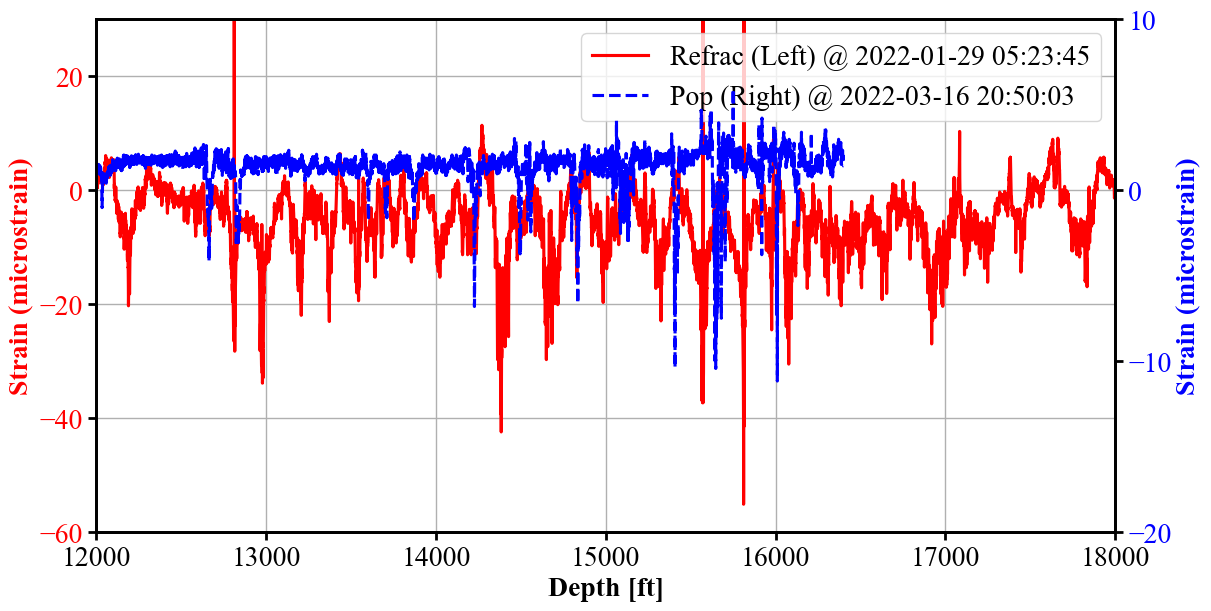

In [ ]:
import h5py
from plot_style import decode_stamps_to_datetimeindex, plot_dual_axis_depth_profile
from matplotlib.ticker import MultipleLocator


# --- 数据源 1（左轴） ---
f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 3 (refrac)/Neubrex_DSS_strain/Zgabay A14H - refrac - strain change.h5','r')

dstrain1 = f1["data"]      # (Nt1, Nz1)
depth1   = f1["depth"]     # (Nz1,)
stamps1  = decode_stamps_to_datetimeindex(f1["stamps"], fmt='%m/%d/%Y %H:%M:%S.%f')  # 如果是其它格式，改这里
times_left = ["2022-01-29 05:23:46"]
window_left = (12000.0, 18000.0)

# --- 数据源 2（右轴） ---
f2 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 5 (POP)/Zgabay A14H - pop - strain change.h5','r')
dstrain2 = f2["data"]      # (Nt2, Nz2)
depth2   = f2["depth"]     # (Nz2,)
stamps2  = decode_stamps_to_datetimeindex(f2["stamps"], fmt='%m/%d/%Y %H:%M:%S.%f')
times_right = ["2022-03-16 20:50:03"] 
window_right = (12000.0, 16400.0)

# --- 画图：x 轴强制 12000–18000 ft，双 y 轴 ---
fig, ax_left, ax_right = plot_dual_axis_depth_profile(
    dstrain_left=dstrain1, depth_left=depth1, times_left=times_left,
    dstrain_right=dstrain2, depth_right=depth2, times_right=times_right,
    depth_window_left=window_left,
    depth_window_right=window_right,
    stamps_index_left=stamps1,
    stamps_index_right=stamps2,

    depth_unit="ft",
    strain_unit_left="(microstrain)",    # 自己改单位显示
    strain_unit_right="(microstrain)",   # 自己改单位显示

    # 如果要取反显示，可以这样开：
    # strain_scale_left=-1.0,
    # strain_scale_right=-1.0,

    invert_left_y=False,                 # ← 左轴是否反转
    invert_right_y=False,                # ← 右轴是否反转
    xlim=(12000.0, 18000.0),             # ← 固定 x 范围
    figsize=(12, 6),
    labels=("Refrac (Left)", "Pop (Right)"),  # 图例前缀
)

# 正常方向（下小上大）
ax_left.set_ylim(-60, 30)
ax_left.yaxis.set_major_locator(MultipleLocator(20))   # 左轴主刻度步长 100

ax_right.set_ylim(-20, 10)
# ax_right.set_yticks([-50, -30, -10, 10])      # 右轴指定刻度
ax_right.yaxis.set_major_locator(MultipleLocator(10))   # 左轴主刻度步长 100
# ax_right.invert_yaxis()

# Fiber slippage calibration

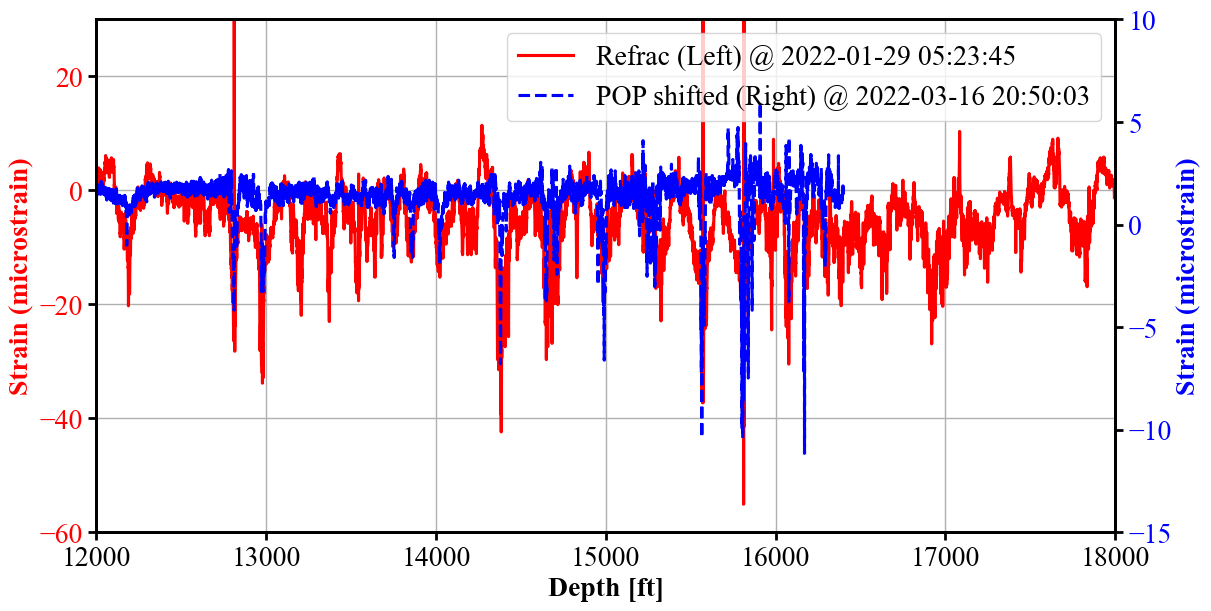

In [8]:

import h5py
from matplotlib.ticker import MultipleLocator
from plot_style import decode_stamps_to_datetimeindex, plot_dual_axis_depth_profile
from slippage_clbrt_shift import shift_depth_piecewise


# ----------------- 你的原始代码 -----------------
# 左轴（refrac）
f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 3 (refrac)/Neubrex_DSS_strain/Zgabay A14H - refrac - strain change.h5','r')
dstrain1 = f1["data"]
depth1   = f1["depth"]
stamps1  = decode_stamps_to_datetimeindex(f1["stamps"], fmt='%m/%d/%Y %H:%M:%S.%f')
times_left  = ["2022-01-29 05:23:46"]
window_left = (12000.0, 18000.0)

# 右轴（POP）
f2 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 5 (POP)/Zgabay A14H - pop - strain change.h5','r')
dstrain2 = f2["data"]
depth2   = f2["depth"]
stamps2  = decode_stamps_to_datetimeindex(f2["stamps"], fmt='%m/%d/%Y %H:%M:%S.%f')
times_right  = ["2022-03-16 20:50:03"]

# === 关键：对 POP 的深度做“分段线性右移” ===
depth2_shifted = shift_depth_piecewise(depth2, z0=12000.0, z1=16000.0, s0=145.0, s1=160.0)

# 右轴选取窗口：现在是“基于平移后的深度”来筛列（保持你原来的 12000~16400）
window_right = (12000.0, 16400.0)

# --- 画图：x 轴强制 12000–18000 ft，双 y 轴 ---
fig, ax_left, ax_right = plot_dual_axis_depth_profile(
    dstrain_left=dstrain1, depth_left=depth1,          times_left=times_left,
    dstrain_right=dstrain2, depth_right=depth2_shifted, times_right=times_right,  # ← 用平移后的 depth
    depth_window_left=window_left,
    depth_window_right=window_right,
    stamps_index_left=stamps1,
    stamps_index_right=stamps2,

    depth_unit="ft",
    strain_unit_left="(microstrain)",
    strain_unit_right="(microstrain)",

    invert_left_y=False,
    invert_right_y=False,
    xlim=(12000.0, 18000.0),
    figsize=(12, 6),
    labels=("Refrac (Left)", "POP shifted (Right)"),
)

# 轴范围/刻度
ax_left.set_ylim(-60, 30)
ax_left.yaxis.set_major_locator(MultipleLocator(20))
ax_right.set_ylim(-15, 10)
ax_right.yaxis.set_major_locator(MultipleLocator(5))


In [ ]:
from slippage_clbrt_shift import shift_depth_piecewise, invert_shift_depth_piecewise

gauges = np.array([13004, 15321, 13753.1])
gauge_to_fiber = invert_shift_depth_piecewise(gauges, z0=12000.0, z1=16000.0, s0=145.0, s1=160.0)
print("测点深度 gauges: ", gauges)
print("对应纤维深度 gauge_to_fiber: ", gauge_to_fiber)


测点深度 gauges:  [13004.  15321.  13753.1]
对应纤维深度 gauge_to_fiber:  [12855.79078456 15164.13449564 13602.09215442]


# plot strain v.s. time in some certain depth

(3415, 57204)


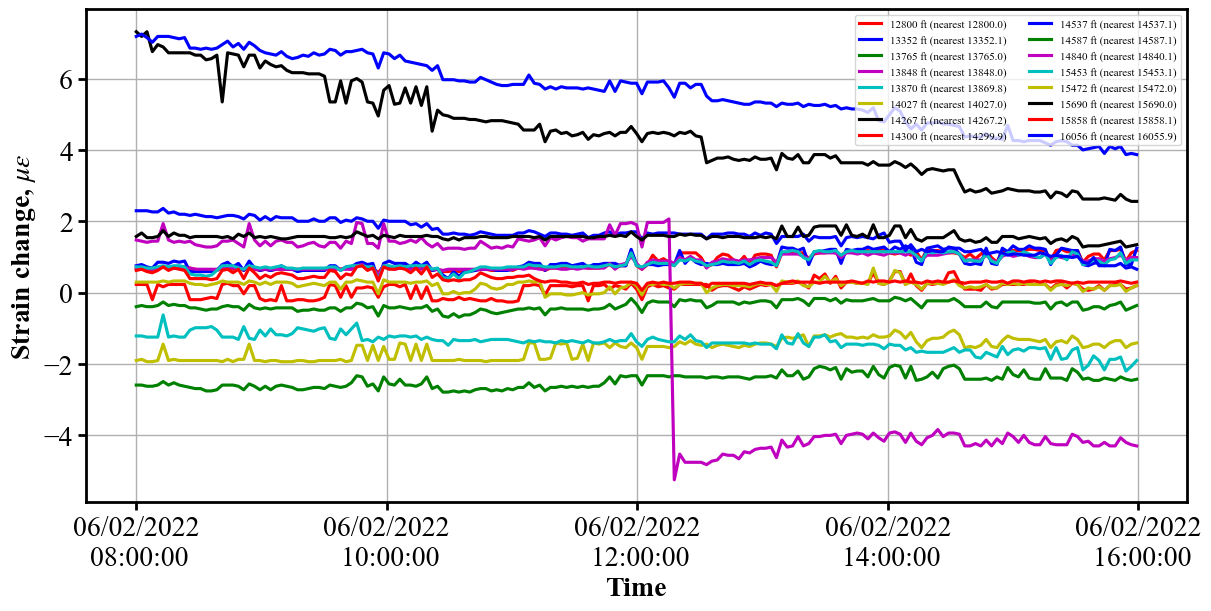

In [96]:
%reload_ext autoreload
%autoreload 2

import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from plot_style import plot_strain_vs_time_at_depths, decode_stamps_to_datetimeindex, save_figure
from matplotlib.ticker import MultipleLocator, FuncFormatter, MaxNLocator, ScalarFormatter, FixedLocator, LogFormatter



# f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 3 (refrac)/Neubrex_DSS_strain/Zgabay A14H - refrac - strain change.h5','r')
# f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 5 (POP)/Zgabay A14H - pop - strain change.h5','r')
f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/Evo_5_6_7_Sep_2025/Evo 7 (flowback)/Zgabay A14H - flowback - strain change.h5','r')
dstrain = (f1['data'])
depth = (f1['depth'])
date_plot = (f1['stamps'])

print(dstrain.shape)  # (时间点数, 深度点数)
# （可选）把 stamps 转为 DatetimeIndex，便于时间戳就近匹配
stamps_idx = decode_stamps_to_datetimeindex(date_plot, fmt='%m/%d/%Y %H:%M:%S.%f') if date_plot is not None else None

# 在 12500 ft 和 16000 ft 这两个深度（最近列），看 strain 随时间
# fig, ax = plot_strain_vs_time_at_depths(
#     dstrain, depth,
#     stamps_index=stamps_idx,
#     target_depths=[12855.79, 15164.13],
#     time_window=("2022-03-15 09:00:00", "2022-03-20 07:30:00"),  # 也可用行号：(500, 1500)
#     scale=1.0,                        # 要换单位直接传 1e6 -> microstrain
#     strain_unit="(microstrain)",
#     figsize=(12, 6), grid=True, legend='auto',
#     # time_format='%m/%d/%Y\n %H:%M:%S',   # ← 这里
#     # time_tick_rotation=0,
#     legend_labels=["Gauge 9", "Gauge 5"],  # 可选：自定义图例  #["12500 ft", "16000 ft"]
# )

# 或：在 16000±25 ft 和 15000±25 ft 窗口里求平均后对比
# fig, ax = plot_strain_vs_time_at_depths(
#     dstrain, depth,
#     stamps_index=stamps_idx,
#     target_depths=[16000, 15000],
#     depth_tolerance=25,
#     reducer="mean",            # 或 "median"
#     scale=1.0, strain_unit="(microstrain)",
#     figsize=(12, 6), grid=True, legend='auto',
#     # time_format='%m/%d/%Y\n %H:%M:%S',   # ← 这里
#     # time_tick_rotation=0,
#     legend_labels=["16000±25 ft", "15000±25 ft"],
# )
# ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
depth_range = np.array([12800, 13352, 13765, 13848, 13870,14027,14267,14300,
                        14537, 14587, 14840, 15453, 15472,15690,15858,16056])
# depth_range = np.array([
#                         12800-3])
# depth_range += 180


fig, ax = plot_strain_vs_time_at_depths(
    dstrain, depth,
    stamps_index=stamps_idx,
    target_depths=depth_range,
    time_window=("2022-06-02 08:00:00", "2022-06-02 16:00:00"),  # 也可用行号：(500, 1500)
    scale=1.0,                        # 要换单位直接传 1e6 -> microstrain
    strain_unit="(microstrain)",
    figsize=(12, 6), grid=True, legend='auto',
    # time_format='%m/%d/%Y\n %H:%M:%S',   # ← 这里
    # time_tick_rotation=0,
    # legend_labels=["index 1", "index 2", "index 3", "index 4", "index 5", "index 6",
    # "index 7", "index 8", "index 9", "index 10", "index 11", "index 12", "index 13", "index 14", "index 15", "index 16",]
    # 可选：自定义图例  ["12500 ft", "16000 ft"]
)
# 将y轴翻转：
# ax.invert_yaxis()
# ax.xaxis.set_major_locator(MaxNLocator(nbins=7))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
# ax.legend(loc='lowre left', ncol=2) #'upper left'
# let legend located out the plot
ax.legend(loc='upper right', ncol=2,fontsize=8)




# leg = ax.get_legend()
# if leg is not None:
#     leg.remove()


# y轴标签
# ax.set_ylabel(r'Strain change, $\mu\varepsilon$')
# save_figure:
# save_figure(fig, 'strain_vs_time_13753ft.png', dpi=600, transparent=False)
